In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [5]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array( [ [2.0,0.8], [0.8,0.6] ] )

data = np.random.multivariate_normal( mean_01, cov_01, 800 )
print data.shape

(800, 2)


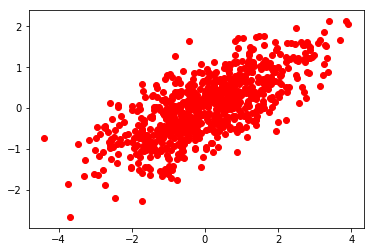

In [7]:
plt.scatter( data[:,0], data[:,-1], c='r' )
plt.show()

In [15]:
def pca(X, d = None):
    if d == None:
        d = X.shape[1]
    ## Coumpute the covariance 
    A = np.cov(X, rowvar=False)
    
    ## Compute EigenValues and Vectors
    eig_vals, eig_vecs = np.linalg.eig(A)
    
    ## Project to a new vector space 
    Z = X.dot(eig_vecs)
    
    ## Reduce dimensiond
    red_Z = Z[:,:d]
    
    return eig_vals, eig_vecs, Z, red_Z

In [16]:
eig_vals, eig_vecs, Z, red_Z = pca(data,1)
print eig_vals.shape
print eig_vecs.shape
print Z.shape
print red_Z.shape

(2,)
(2, 2)
(800, 2)
(800, 1)


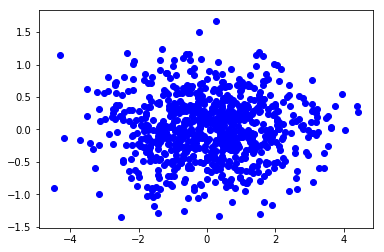

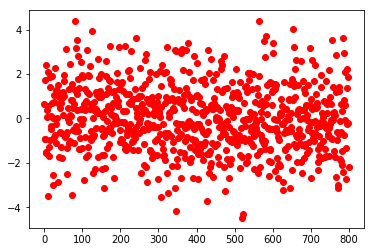

In [18]:
plt.scatter( Z[:,0], Z[:,1], c = 'b' )
plt.show()

index = np.array( range(red_Z.shape[0]) )
plt.scatter( index[:], red_Z[:], c = 'r' )
plt.show()

In [24]:
info = []
for ix in range(eig_vals.shape[0]):
    info.append( [eig_vals[ix], eig_vecs[:, ix ]] )
info = sorted( info, reverse=True, key = lambda r:r[0] )
print info

[[2.2076591730883539, array([ 0.91120254,  0.41195864])], [0.23163902625170324, array([-0.41195864,  0.91120254])]]


In [25]:
sorted_vals = []
sorted_vecs = []
for ix in range( len(info) ):
    sorted_vals.append( info[ix][0] )
    sorted_vecs.append( info[ix][1] )
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)
print sorted_vals.shape
print sorted_vecs.shape

(2,)
(2, 2)


In [26]:
explained_variance_ratio = sorted_vals/sum(sorted_vals)
print explained_variance_ratio

[ 0.90503866  0.09496134]


In [29]:
def getExplainedVariance(X,d = None):
    eig_vals, eig_vecs, Z, red_Z = pca(X)
    info = []
    for ix in range(eig_vals.shape[0]):
        info.append( [eig_vals[ix], eig_vecs[:, ix ]] )
    info = sorted( info, reverse=True, key = lambda r:r[0] )
    sorted_vals = []
    sorted_vecs = []
    for ix in range( len(info) ):
        sorted_vals.append( info[ix][0] )
        sorted_vecs.append( info[ix][1] )
    sorted_vals = np.asarray(sorted_vals)
    sorted_vecs = np.asarray(sorted_vecs)
    explained_variance_ratio = sorted_vals/sum(sorted_vals)
    return explained_variance_ratio

In [30]:
df = pd.read_csv('/Users/suruchichopra/Desktop/Suransh/Machine Learning/mnist_train.csv')
df.head(n=3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df.values[:1000, 1:]
labels = df.values[:, 0]
